In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Plotting defaults for matplotlib

In [36]:
# this changes the default plotting for matplotlib
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [3, 2]
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 8
mpl.rcParams['legend.fontsize'] = 'small'
mpl.rcParams['figure.titlesize'] = 'small'
mpl.rcParams['lines.linewidth']= 1.0

In [31]:
# suppose you have some data and one of the values is bad
x = np.array([1, 2, 3, -99, 5])

In [5]:
# if we take the average we get something very wrong
x.mean()

-17.6

In [6]:
# you can mask the missing data
mx = np.ma.masked_array(x, mask=[0, 0, 0, 1, 0])
mx

masked_array(data=[1, 2, 3, --, 5],
             mask=[False, False, False,  True, False],
       fill_value=999999)

In [7]:
# missing data shows up as --

In [8]:

# then the mean works
mx.mean()

2.75

In [9]:
# mask the data where a certain logical statement is true
mx2 = np.ma.masked_where(x < 0, x)
mx2

masked_array(data=[1, 2, 3, --, 5],
             mask=[False, False, False,  True, False],
       fill_value=999999)

In [11]:
# in order to mask any datapoints that are below zero, you can assign it a locgical statement masked_where(x < 0, x)

In [10]:
# note this syntax is the same result as above
np.mean(mx2)

2.75

## Example from tutorial: Masked Statistics

In [13]:
data = np.loadtxt('populations.txt')

In [14]:
# note the data is year, pop1, pop2, pop3
data

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

In [19]:
data.shape
# this is time in years x variables

(21, 4)

In [16]:
# extract all times (all elements in first dim) and all years (first index in second dim)
data[:,0]

array([1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
       1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917.,
       1918., 1919., 1920.])

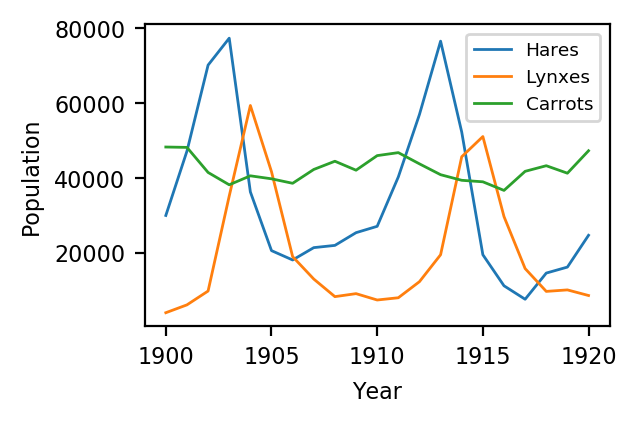

In [37]:
# time vs population plots
#plt.figure(figsize=(3, 2))
plt.plot(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,2])
plt.plot(data[:,0], data[:,3])
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(['Hares', 'Lynxes', 'Carrots'], loc = 'upper right')

In [18]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line.set_label('Label via method')
        line, = ax.plot([1, 2, 3])
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st

### lets rename the data to make it easier to deal with

In [23]:
data.T
# the .T transposes the data
# we have years as a row instead of a column

array([[ 1900.,  1901.,  1902.,  1903.,  1904.,  1905.,  1906.,  1907.,
         1908.,  1909.,  1910.,  1911.,  1912.,  1913.,  1914.,  1915.,
         1916.,  1917.,  1918.,  1919.,  1920.],
       [30000., 47200., 70200., 77400., 36300., 20600., 18100., 21400.,
        22000., 25400., 27100., 40300., 57000., 76600., 52300., 19500.,
        11200.,  7600., 14600., 16200., 24700.],
       [ 4000.,  6100.,  9800., 35200., 59400., 41700., 19000., 13000.,
         8300.,  9100.,  7400.,  8000., 12300., 19500., 45700., 51100.,
        29700., 15800.,  9700., 10100.,  8600.],
       [48300., 48200., 41500., 38200., 40600., 39800., 38600., 42300.,
        44500., 42100., 46000., 46800., 43800., 40900., 39400., 39000.,
        36700., 41800., 43300., 41300., 47300.]])

In [24]:
# make vectors of the variables
year, hares, lynxes, carrots = data.T  # trick: columns to variables

In [25]:
year

array([1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
       1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917.,
       1918., 1919., 1920.])

In [26]:
hares

array([30000., 47200., 70200., 77400., 36300., 20600., 18100., 21400.,
       22000., 25400., 27100., 40300., 57000., 76600., 52300., 19500.,
       11200.,  7600., 14600., 16200., 24700.])

In [27]:
lynxes

array([ 4000.,  6100.,  9800., 35200., 59400., 41700., 19000., 13000.,
        8300.,  9100.,  7400.,  8000., 12300., 19500., 45700., 51100.,
       29700., 15800.,  9700., 10100.,  8600.])

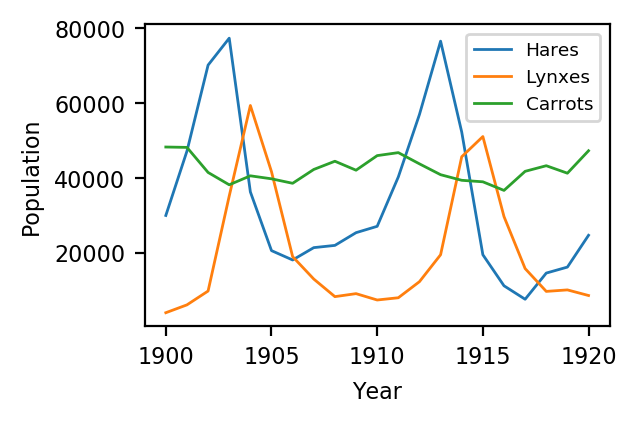

In [38]:
# note this is the same as above
plt.plot(year, hares)
plt.plot(year, lynxes)
plt.plot(year, carrots)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(['Hares', 'Lynxes', 'Carrots'], loc = 'upper right')

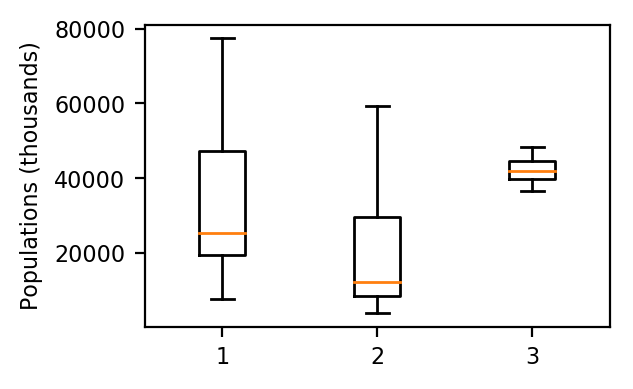

In [39]:
# how about a boxplot?
# see:
# https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py

plt.boxplot([hares, lynxes, carrots])
#plt.xlabel('hares, lynxes, carrots')
plt.ylabel('Populations (thousands)')
labels = ('hares', 'lynxes', 'carrots')

# orange line is median

### New problem with this data (1.3.5.3)
Canadian rangers were distracted when counting hares and lynxes in 1903-1910 and 1917-1918, and got the numbers are wrong. (Carrot farmers stayed alert, though.) Compute the mean populations over time, ignoring the invalid numbers.
So the problem is that the hare and lynx data are bad in these years. So we need to mask these dates before we take the averages.
Let's take the averages of the data first, before we mask. We either need to use the separate data vectors, or we need to be clever about taking the average of the matrix along the correct axis

In [40]:
# create a mask using logical indexing

In [44]:
data.mean()
# this just gives us the mean of the whole array, which is not helpful
# remember that the data is time x variables, so we want to average over the time index


24639.404761904763

#### two syntaxes to ask the means of the variables

In [45]:
np.mean(data, axis = 0)

array([ 1910.        , 34080.95238095, 20166.66666667, 42400.        ])

In [47]:
data.mean(axis = 0)

array([ 1910.        , 34080.95238095, 20166.66666667, 42400.        ])

#### instead take the mean of the 3 variables

In [48]:
#### instead take the mean of the 3 variables

print(hares.mean())
print(lynxes.mean())
print(carrots.mean())

34080.95238095238
20166.666666666668
42400.0


#### So we want to mask out the years 1903-1920, and 1917 and 1918

In [53]:
year

array([1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
       1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917.,
       1918., 1919., 1920.])

In [55]:
(year >= 1903) & (year<= 1910)|(year>= 1917) & (year<= 1918)

#use the ampersand, the "and" doesnt work
# either | or 

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False, False])

#### all of the trues are the ones you are masking 

In [56]:
mymask = ((year >= 1903) & (year<= 1910)|(year>= 1917) & (year<= 1918))

In [61]:
# apply this mask to the variables
lynxes_masked = np.ma.masked_where(mymask,lynxes)
hares_masked = np.ma.masked_where(mymask,hares)

In [62]:
lynxes_masked

masked_array(data=[4000.0, 6100.0, 9800.0, --, --, --, --, --, --, --, --,
                   8000.0, 12300.0, 19500.0, 45700.0, 51100.0, 29700.0,
                   --, --, 10100.0, 8600.0],
             mask=[False, False, False,  True,  True,  True,  True,  True,
                    True,  True,  True, False, False, False, False, False,
                   False,  True,  True, False, False],
       fill_value=1e+20)

In [63]:
hares_masked

masked_array(data=[30000.0, 47200.0, 70200.0, --, --, --, --, --, --, --,
                   --, 40300.0, 57000.0, 76600.0, 52300.0, 19500.0,
                   11200.0, --, --, 16200.0, 24700.0],
             mask=[False, False, False,  True,  True,  True,  True,  True,
                    True,  True,  True, False, False, False, False, False,
                   False,  True,  True, False, False],
       fill_value=1e+20)

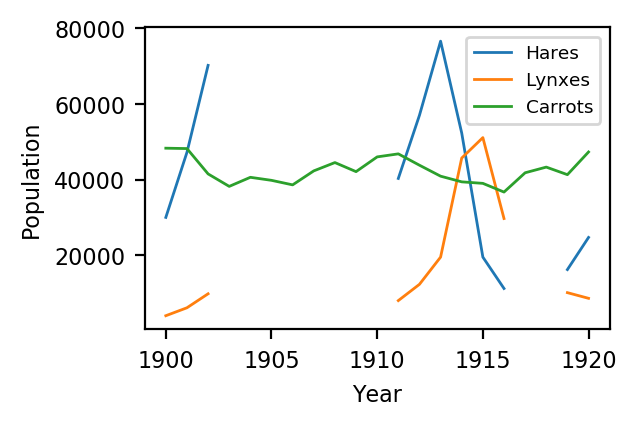

In [64]:
# note this is the same as above
plt.plot(year, hares_masked)
plt.plot(year, lynxes_masked)
plt.plot(year, carrots)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(['Hares', 'Lynxes', 'Carrots'], loc = 'upper right')

In [65]:
### Now you can see that the bad data was masked, and now you can take a mean of those masked variables

In [67]:
print(hares.mean())
print(hares_masked.mean())

34080.95238095238
40472.72727272727


In [68]:
print(lynxes.mean())
print(lynxes_masked.mean())

20166.666666666668
18627.272727272728


# Challenge problems
1) There was an issue with the counting methods. The hare populations were poorly estimated when the populations were over 6000. Mask out the years this was true and recalcuate the averages.
2) Using the original data, what is the pairwise (pearson) correlation between the three populations? How do you calculate this in python? What if you put in a lag in the population, e.g. the hare population with the lynx population a year later? What lag gives you the best correlations between the populations?

In [72]:
hares

array([30000., 47200., 70200., 77400., 36300., 20600., 18100., 21400.,
       22000., 25400., 27100., 40300., 57000., 76600., 52300., 19500.,
       11200.,  7600., 14600., 16200., 24700.])

In [73]:
(hares>=60000)

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False])

In [85]:
haremask = (hares<=60000)

In [86]:
hares_masked = np.ma.masked_where(haremask,hares)

In [87]:
print(hares_masked)

[-- -- 70200.0 77400.0 -- -- -- -- -- -- -- -- -- 76600.0 -- -- -- -- --
 -- --]


In [89]:
print(hares.mean())
print(hares_masked.mean())

34080.95238095238
74733.33333333333


# challenge 2

In [91]:
np.corrcoef(hares,lynxes)
# r = 0.07
# not highly correlated

array([[1.        , 0.07189206],
       [0.07189206, 1.        ]])

In [99]:
np.corrcoef(carrots,hares)
# r = -0.016
# more correlated

array([[ 1.        , -0.01660378],
       [-0.01660378,  1.        ]])

In [101]:
np.corrcoef(carrots,lynxes)
# -0.68 
# correlated

array([[ 1.        , -0.68057717],
       [-0.68057717,  1.        ]])